all Test

In [2]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# 获取股票数据
stock_symbol = "AAPL"  # 你可以替换为其他股票代码
stock = yf.Ticker(stock_symbol)
data = stock.history(period="1y")  # 获取最近1年的股票数据

# 计算成交量的5日均线
data['Volume_MA5'] = data['Volume'].rolling(window=5).mean()

# 判断量能趋势
def analyze_volume_trend(data):
    # 比较当前量能与5日均线的关系
    data['Volume_Trend'] = data['Volume'] > data['Volume_MA5']
    
    # 输出趋势分析
    for date, row in data.iterrows():
        if row['Volume_Trend']:
            print(f"{date.date()}: 放量上涨 (Volume: {row['Volume']}, MA5: {row['Volume_MA5']})")
        else:
            print(f"{date.date()}: 缩量上涨或下跌 (Volume: {row['Volume']}, MA5: {row['Volume_MA5']})")

# 分析量能趋势
analyze_volume_trend(data)

# 绘制图表展示
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(data['Close'], label="Stock Price")
plt.title(f"{stock_symbol} Stock Price")
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(data['Volume'], label="Volume", color='orange')
plt.plot(data['Volume_MA5'], label="Volume MA5", color='green')
plt.title(f"{stock_symbol} Volume and 5-day Moving Average")
plt.legend()

plt.tight_layout()
plt.show()


YFRateLimitError: Too Many Requests. Rate limited. Try after a while.

In [1]:
import matplotlib.pyplot as plt

%matplotlib widget
%config InlineBackend.close_figures=False
plt.ioff()

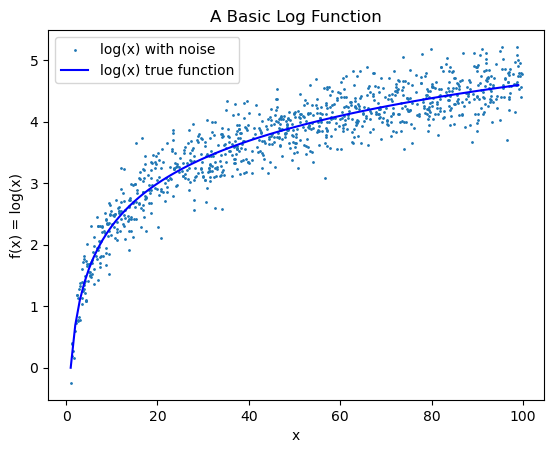

In [2]:
import numpy as np
import pylab as pl

%matplotlib inline
x = np.random.uniform(1, 100, 1000)
y = np.log(x) + np.random.normal(0, 0.3, 1000)

pl.scatter(x, y, s=1, label="log(x) with noise")

pl.plot(
    np.arange(1, 100), np.log(np.arange(1, 100)), c="b", label="log(x) true function"
)
pl.xlabel("x")
pl.ylabel("f(x) = log(x)")
pl.legend(loc="best")
pl.title("A Basic Log Function")
pl.show()

In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["is_train"] = np.random.uniform(0, 1, len(df)) <= 0.75
df["species"] = pd.Categorical.from_codes(iris.target, iris.target_names)
df.head()

train, test = df[df["is_train"] == True], df[df["is_train"] == False]

features = df.columns[:4]
clf = RandomForestClassifier(n_jobs=2)
y, _ = pd.factorize(train["species"])
clf.fit(train[features], y)

preds = iris.target_names[clf.predict(test[features])]

pd.crosstab(test["species"], preds, rownames=["actual"], colnames=["preds"])

preds,setosa,versicolor,virginica
actual,,,
setosa,10,0,0
versicolor,0,12,5
virginica,0,1,13


In [4]:
import numpy as np
import pandas as pd


def trendline(data, order=1):
    coeffs = np.polyfit(data.index.values, list(data), order)
    print(coeffs)
    slope = coeffs[-2]
    return float(slope)


# Sample Dataframe
revenue = [0.85, 0.99, 1.01, 1.12, 1.25, 1.36, 1.28, 1.44]
year = [1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000]
df = pd.DataFrame({"year": year, "revenue": revenue})


slope = trendline(df["revenue"])
print(slope)

[0.08047619 0.88083333]
0.08047619047619048


In [11]:
import os
os.getcwd()

'D:\\MacTools\\WorkFile\\WorkSpace\\pyQuant\\stock\\jupyterAlgo'

## Trend line continuation

In [ ]:
# https://stackoverflow.com/questions/71701506/trend-line-continuation

koef_up 1.003 koef_dn 1.0015


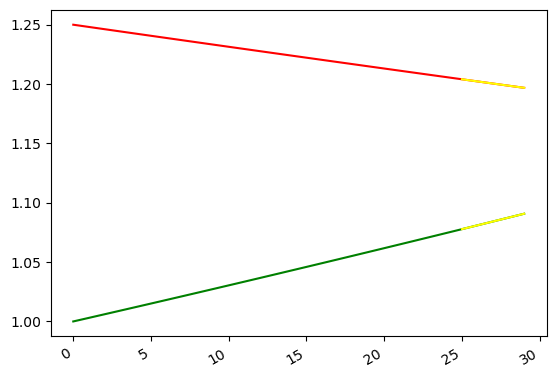

In [1]:
import matplotlib.pyplot as plt
import numpy as np

up = []
dn = []
up.append(1.00)
dn.append(1.25)
for i in range(1, 25):
    dn.append(dn[i-1] / 1.0015)
    up.append(up[i-1] * 1.003)

#We absolutely do not know what the trend lines should be in the future.
koef_up = up[len(up)-1] / up[len(up)-2]#get coeficents up
koef_dn = dn[len(up)-2] / dn[len(up)-1]#get coeficents dn
print('koef_up', koef_up, 'koef_dn', koef_dn)

for i in range(25, 30):
    up.append(up[i-1] * koef_up)#calculate line to the future up
    dn.append(dn[i-1] / koef_dn)#calculate line to the future dn

ind = np.arange(30)
fig, ax = plt.subplots()
ax.plot(ind, up, color="green")
ax.plot(ind, dn, color="red")
ax.plot(ind[25:], up[25:], color="yellow")
ax.plot(ind[25:], dn[25:], color="yellow")
fig.autofmt_xdate()
plt.show()